In [1]:
# import required library
if (!require(dummies)) {
    install.packages("dummies")
}
if (!require(DAAG)) {
    install.packages("DAAG")
}
library(dummies)  # dummy variable
library(moments)  # skewness
library(corrplot)  # corrplot
library(DAAG)  # cross-validation

Loading required package: dummies
dummies-1.5.6 provided by Decision Patterns

Loading required package: DAAG
Loading required package: lattice


In [2]:
# load the data set
data = read.csv('./train.csv')

In [3]:
# compute the number of missing values in each column
num.NA = colSums(apply(data[, -c(1, 81)], 2, is.na))
data.type = sapply(data[, names(which(num.NA != 0))], class)

In [4]:
# drop column of Alley, PoolQC, Fence, MiscFeature
drop.names = c("Alley", "PoolQC", "Fence", "MiscFeature")
data = data[ , !(names(data) %in% drop.names)]

In [5]:
# find all categorical and numerical variables
data.type = sapply(data[ , -c(1, ncol(data))], class)
categorical.var = names(data)[which(c(NA, data.type, NA) == 'factor')]
numerical.var = names(data)[which(c(NA, data.type, NA) == 'integer')]

In [6]:
# create new feature named "NA" for categorical variables
for (i in categorical.var) {
    data[, i] = addNA(data[, i])
}

In [7]:
# create new feature using the median value for numerical variables
numerical.missing.var = c('LotFrontage', 'MasVnrArea', 'GarageYrBlt')
for (i in numerical.missing.var) {
    na.id = is.na(data[, i])
    tmp.median = median(data[, i], na.rm=TRUE)
    data[which(na.id), i] = tmp.median
#     data[, paste(i, 'NAInd', sep='_')] = as.numeric(na.id)
}

In [8]:
# transform the response variable into log scale
data$SalePrice = log(data$SalePrice + 1)

# transform numerical feature whose skewness is larger than 0.75
skewed.features = sapply(data[, numerical.var], skewness)
skewed.features = numerical.var[which(skewed.features > 0.75)]
for (i in skewed.features) {
    data[, i] = log(data[, i] + 1)
}

In [9]:
# directly transform "Street", "Utilities" and "CentralAir" into 0-1 values
data[, 'Street'] = as.numeric(data[, 'Street']) - 1
data[, 'Utilities'] = as.numeric(data[, 'Utilities']) - 1
data[, 'CentralAir'] = as.numeric(data[, 'CentralAir']) - 1

In [10]:
# find new categorical variable to create dummy variables
categorical.var = names(which(sapply(data[, categorical.var], function(x) length(unique(x))) > 2))
dummy.var = data.frame(dummy.data.frame(data[, categorical.var], sep='.'))
data = cbind(data, dummy.var)

In [11]:
# drop original categorical variables
data = data[ , !(names(data) %in% categorical.var)]

# With all variables

Warning message in predict.lm(subs.lm, newdata = data[rows.out, ]):
“prediction from a rank-deficient fit may be misleading”Warning message in predict.lm(subs.lm, newdata = data[rows.out, ]):
“prediction from a rank-deficient fit may be misleading”Warning message in predict.lm(subs.lm, newdata = data[rows.out, ]):
“prediction from a rank-deficient fit may be misleading”Warning message in predict.lm(subs.lm, newdata = data[rows.out, ]):
“prediction from a rank-deficient fit may be misleading”Warning message in predict.lm(subs.lm, newdata = data[rows.out, ]):
“prediction from a rank-deficient fit may be misleading”

Warning message in cv.lm(data, SalePrice ~ ., m = 5, seed = 29, printit = FALSE):
“

 As there is >1 explanatory variable, cross-validation
 predicted values for a fold are not a linear function
 of corresponding overall predicted values.  Lines that
 are shown for the different folds are approximate
”

[1] 54.76064

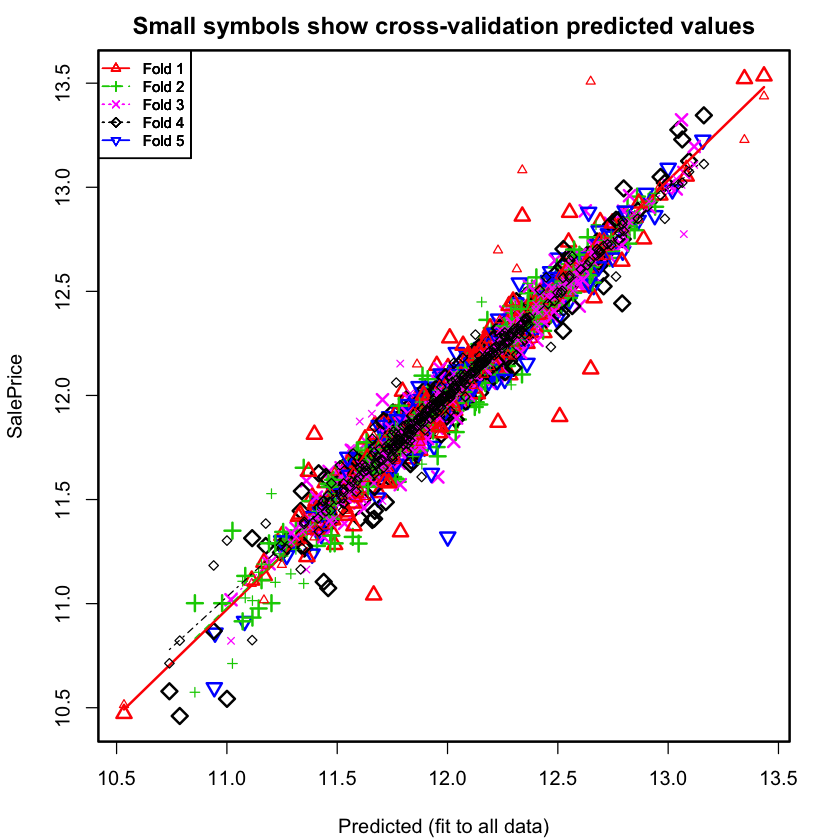

In [12]:
# build a simple linear regression model
model = lm(SalePrice ~ ., data=data)
# summary(model)
model.cv = cv.lm(data, SalePrice ~ ., m=5, seed=29, printit=FALSE)
attr(model.cv, "ms")

# With only numerical variables

Warning message in predict.lm(subs.lm, newdata = data[rows.out, ]):
“prediction from a rank-deficient fit may be misleading”Warning message in predict.lm(subs.lm, newdata = data[rows.out, ]):
“prediction from a rank-deficient fit may be misleading”Warning message in predict.lm(subs.lm, newdata = data[rows.out, ]):
“prediction from a rank-deficient fit may be misleading”Warning message in predict.lm(subs.lm, newdata = data[rows.out, ]):
“prediction from a rank-deficient fit may be misleading”Warning message in predict.lm(subs.lm, newdata = data[rows.out, ]):
“prediction from a rank-deficient fit may be misleading”

Warning message in cv.lm(data[, c(numerical.var, "SalePrice")], SalePrice ~ ., m = 5, :
“

 As there is >1 explanatory variable, cross-validation
 predicted values for a fold are not a linear function
 of corresponding overall predicted values.  Lines that
 are shown for the different folds are approximate
”

[1] 260.4477

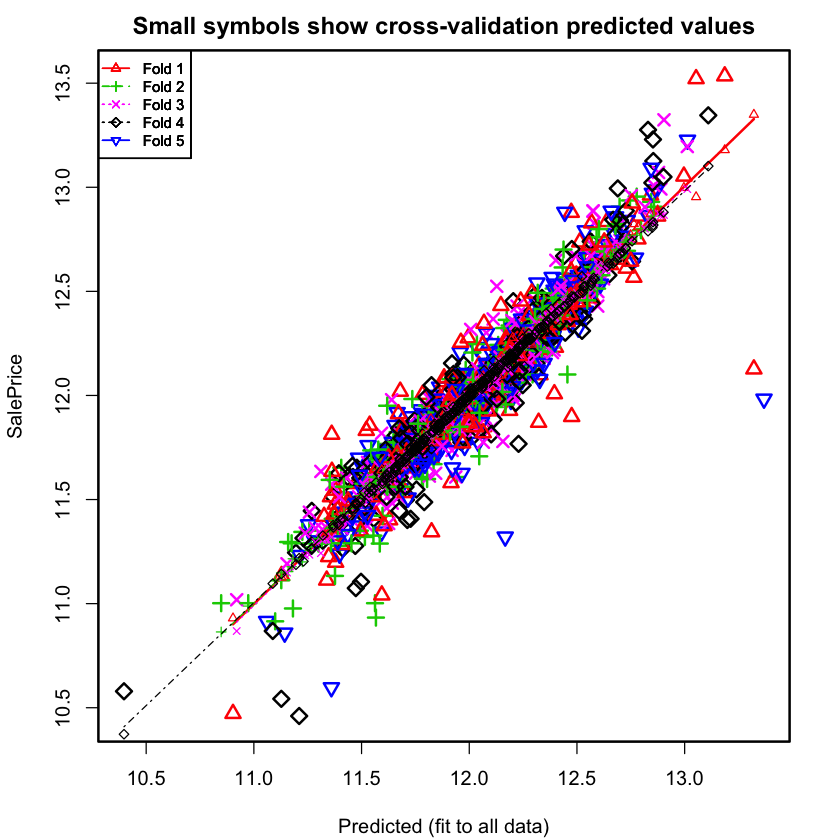

In [13]:
# build a simple linear regression model
model = lm(SalePrice ~ ., data=data[, c(numerical.var, 'SalePrice')])
model.cv = cv.lm(data[, c(numerical.var, 'SalePrice')], SalePrice ~ ., m=5, seed=29, printit=FALSE)
attr(model.cv, "ms")